In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.shape

(48, 5)

In [4]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [5]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
print(x.shape)
print(y.shape)

(48, 4)
(48,)


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36, 4)
(12, 4)
(36,)
(12,)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [11]:
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.6935367603131035
Testing Score 0.4329787231207486


In [14]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[559.47217365 599.95275522 612.13311006 576.59375825 603.90011852
 684.49819301 523.79409821 523.32835728 661.16168997 524.63906249
 639.8133327  582.30072134]


In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [17]:
mae = mean_absolute_error(y_test,ypred_m1)
mse = mean_squared_error(y_test,ypred_m1)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m1))
r2s = r2_score(y_test,ypred_m1)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2-score',r2s)
print('Model score',m1.score(x_test,y_test))

MAE 54.02550430959834
MSE 3509.326183787736
RMSE 59.23956603308076
R2-score 0.4329787231207486
Model score 0.4329787231207486


In [12]:
import seaborn as sns

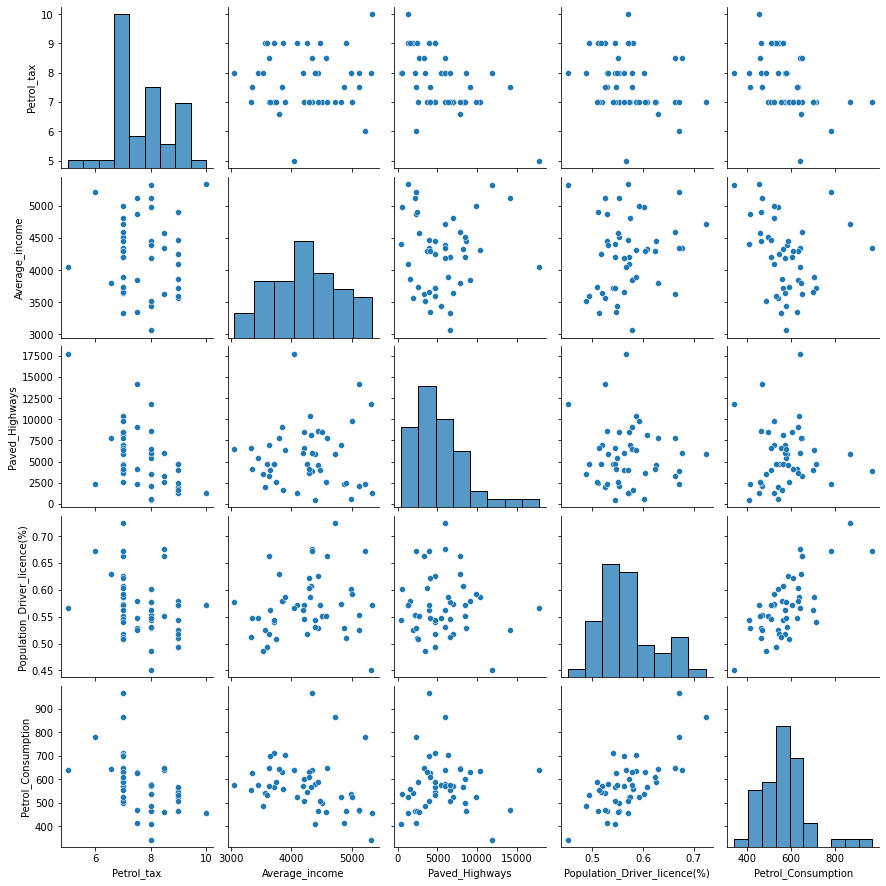

In [13]:
sns.pairplot(data=df)
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [20]:
m2 = RandomForestRegressor(n_estimators=75,criterion='mse')
m2.fit(x_train,y_train)

RandomForestRegressor(n_estimators=75)

In [21]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.9279208582227527
Testing Score 0.7261741963860937


In [22]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[569.13333333 550.01333333 625.12       591.88       607.48
 641.29333333 591.34666667 484.98666667 643.32       480.24
 642.04       543.78666667]


In [23]:
mae = mean_absolute_error(y_test,ypred_m2)
mse = mean_squared_error(y_test,ypred_m2)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m2))
r2s = r2_score(y_test,ypred_m2)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2-score',r2s)
print('Model score',m2.score(x_test,y_test))

MAE 33.78
MSE 1694.7231111111112
RMSE 41.16701484333193
R2-score 0.7261741963860937
Model score 0.7261741963860937


#### Exercise
Q) Apply Remaining models on the same data<br>
1) DecisionTreeRegressor<br>
2) KneighborsRegressor<br>
3) SVR